# **Humidity Regression**
* **Linear Regression**
* **PolyNomial Linear Regression**

### **1. Import Library**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

### **2. Get Data**

In [ ]:
# Mount driver on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Tạo thư mục 'Lesson 1' để lưu dataset
path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
os.mkdir('Lesson 1')
new_path = os.path.join('/content', 'Lesson 1')
print(new_path)
os.chdir(new_path)

/content/Lesson 1


In [ ]:
# Unzip dataset vào thư mục 'Lesson 1'
import zipfile

with zipfile.ZipFile(os.path.join(path, 'AI Specialist Lesson 01.zip'), 'r') as zip_file:
  zip_file.extractall(new_path)

### **3. EDA**

In [ ]:
# Read dataset
data = pd.read_csv('AI Specialist Lesson 01 (Tutorial and Exercises)/Humidity_Temp_Prediction.csv',
                   delimiter=';')
display(data.head())
print(data.info())

,id,temp,humidity,date_time
0,9197,21,20,2016-08-17 00:00:01
1,9198,21,20,2016-08-17 00:01:01
2,9199,21,20,2016-08-17 00:02:01
3,9200,21,20,2016-08-17 00:03:01
4,9201,21,20,2016-08-17 00:04:01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619999 entries, 0 to 619998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         619999 non-null  int64 
 1   temp       619999 non-null  int64 
 2   humidity   619999 non-null  int64 
 3   date_time  619999 non-null  object
dtypes: int64(3), object(1)
memory usage: 18.9+ MB
None


>Cột date_time có dtype là object (cũng như string), với dữ liệu về ngày tháng, nếu để nó dạng object hay string sẽ khó trong quá trình lấy thông tin về sau, chính vì thế cần chuyển nó về format ngày tháng.

In [ ]:
data = pd.read_csv('AI Specialist Lesson 01 (Tutorial and Exercises)/Humidity_Temp_Prediction.csv',
                   delimiter=';', parse_dates=['date_time'])
display(data.head())
print(data.info())

,id,temp,humidity,date_time
0,9197,21,20,2016-08-17 00:00:01
1,9198,21,20,2016-08-17 00:01:01
2,9199,21,20,2016-08-17 00:02:01
3,9200,21,20,2016-08-17 00:03:01
4,9201,21,20,2016-08-17 00:04:01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619999 entries, 0 to 619998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         619999 non-null  int64         
 1   temp       619999 non-null  int64         
 2   humidity   619999 non-null  int64         
 3   date_time  619999 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 18.9 MB
None


> **Quan sát**:
* Cột date_time cập nhật các thông tin về temp và humidity 1 phút 1 lần, mục đích của ta là theo dõi quá trình biến đổi của temp và humidity.
* Như vậy ta cần 1 khoảng thời gian mang tính chu kỳ để theo dõi quá trình biến đổi của temp và humidity. Cũng đồng thời để sau này đưa ra dự đoán.
* Ex: Ta có thể đưa ra dự đoán rằng trong ngày tiếp theo, nhiệt độ và độ ẩm đều giảm.
* ==> Chu kỳ này cần mang ý nghĩa, thí dụ ta chọn chu kỳ này là 1 phút, thì việc dự đoán được temp và  humidity trong phút tiếp theo gần như là không mang lại lợi ích gì trong trường hợp này.
* ==> Chọn chu kỳ theo dõi này là 1 ngày (24 hours)

In [ ]:
# Extract useful information form data_time columns
# Cần tạo cột minute bắt đầu từ phút đầu tiên đến phút cuối cùng của 1 ngày.

data['minute'] = data['date_time'].dt.minute
data['hour'] = data['date_time'].dt.hour

data['minute'] = data['minute'] + 60*data['hour']

data['month'] = data['date_time'].dt.month
display(data.head())

,id,temp,humidity,date_time,minute,hour,month
0,9197,21,20,2016-08-17 00:00:01,0,0,8
1,9198,21,20,2016-08-17 00:01:01,1,0,8
2,9199,21,20,2016-08-17 00:02:01,2,0,8
3,9200,21,20,2016-08-17 00:03:01,3,0,8
4,9201,21,20,2016-08-17 00:04:01,4,0,8


In [ ]:
Numeric_StatsDFdata = data.describe(include=np.number) # Describe bao gồm các cột có loại number
display(Numeric_StatsDFdata)

,id,temp,humidity,minute,hour,month
count,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000
mean,319196.000000,19.365405,41.340391,715.723067,11.436893,7.460789
std,178978.439111,1.523185,32.418998,417.192832,6.946960,3.360717
min,9197.000000,15.000000,16.000000,0.000000,0.000000,1.000000
25%,164196.500000,18.000000,20.000000,354.000000,5.000000,5.000000
50%,319196.000000,19.000000,21.000000,711.000000,11.000000,8.000000
75%,474195.500000,20.000000,95.000000,1079.000000,17.000000,10.000000
max,629195.000000,28.000000,95.000000,1439.000000,23.000000,12.000000


In [ ]:
print(data.shape[0])

619999


> Nhận xét:
* count = 619999 bằng với data.shape[0]
* Các thống kê về temp và humidity không có gì bất ổn
* minute có min = 0, max = 1439 thể hiện số phút trong 1 ngày.
* hour có min = 0, max = 24 thể hiện số giờ trong ngày.
* month có min = 1, max = 12 thê hiện số tháng trong năm.
* ==> Dataset là các giá trị của temp và humidity, giá trị này được cập nhật từng phút trong 1 ngày trong vòng 1 năm.

> Cách thức nhận xét các phân vị:
* Phân vị thứ 50 (Q2) còn được gọi là Trung vị (median).
* Đối với temp, mean và median xấp xỉ nhau, mean+std sẽ xấp xỉ trung vị thứ 75 (Q3) và mean-std sẽ xấp xỉ trung vị thứ 25 (Q1).
* Các outlier cũng được xác định dựa vào tứ phân vị.
* humidity thì các giá trị phân bố không được đẹp như temp.
* Hiểu hơn về phân vị tại http://thongke.cesti.gov.vn/dich-vu-thong-ke/tai-lieu-phan-tich-thong-ke/845-thong-ke-mo-ta-trong-nghien-cuu-dai-luong-do-phan-tan#:~:text=Ph%C6%B0%C6%A1ng%20sai%20(Variance)%20l%C3%A0%20th%C6%B0%E1%BB%9Bc,l%E1%BB%87ch%20trong%20t%E1%BA%ADp%20d%E1%BB%AF%20li%E1%BB%87u.

In [ ]:
Category_StatsDF = data.describe(exclude=np.number) # Describe ngoại trừ các cột loại number
display(Category_StatsDF)

,date_time
count,619999
unique,619985
top,2017-11-04 17:43:33
freq,3
first,2016-08-17 00:00:01
last,2017-12-17 03:17:02


### **4. Visualize Data**

In [ ]:
def SensorVisualize(df, feature_X, feature_Y, savefig=False):
  plt.figure(figsize=(18, 5))
  plt.scatter(df[feature_X], df[feature_Y])
  plt.plot(df[feature_X], df[feature_Y])
  plt.title(f'{feature_X} vs {feature_Y}', size=20)
  plt.xlabel(feature_X, size=20)
  plt.ylabel(feature_Y, size=20)
  plt.grid()
  if savefig:
    plt.savefig(f'{feature_X} vs {feature_Y} Analysis.jpg')

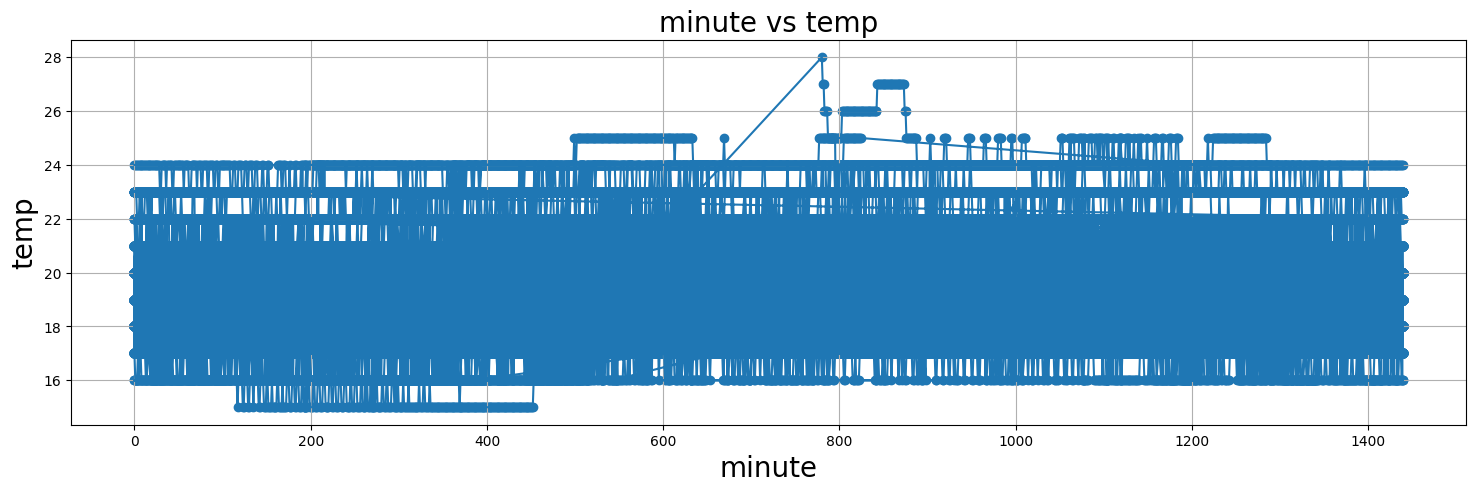

In [ ]:
SensorVisualize(data, 'minute', 'temp')

> **Nhận xét:**
* Các giá trị của minute từ 0 đến 1399 sẽ được lặp đi lặp lại mỗi ngày, vì thế khi visualize như cách trên tại 1 vị trí của minute tất các các giá trị của temp trong cùng 1 năm sẽ được vẽ cùng lúc.
* ==> Giải pháp: Tính mean cho tất cả các giá trị trong năm của minute tại 1 thời điểm (Ex: tại 1 thời điểm trong ngày sẽ chỉ có 1 giá trị của temp, giá trị này là mean của tất cả các giá trị tại thời điểm minute = 0 trong năm)

In [ ]:
data1 = data[['minute', 'temp']]
display(data1)

,minute,temp
0,0,21
1,1,21
2,2,21
3,3,21
4,4,21
...,...,...
619994,193,18
619995,194,18
619996,195,18
619997,196,19


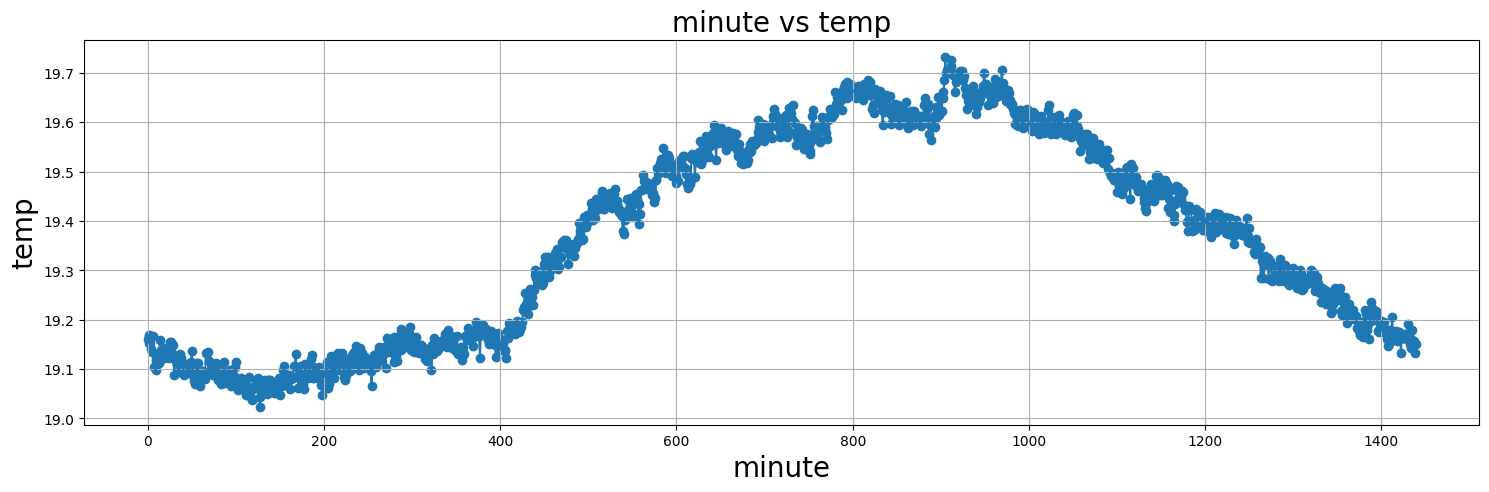

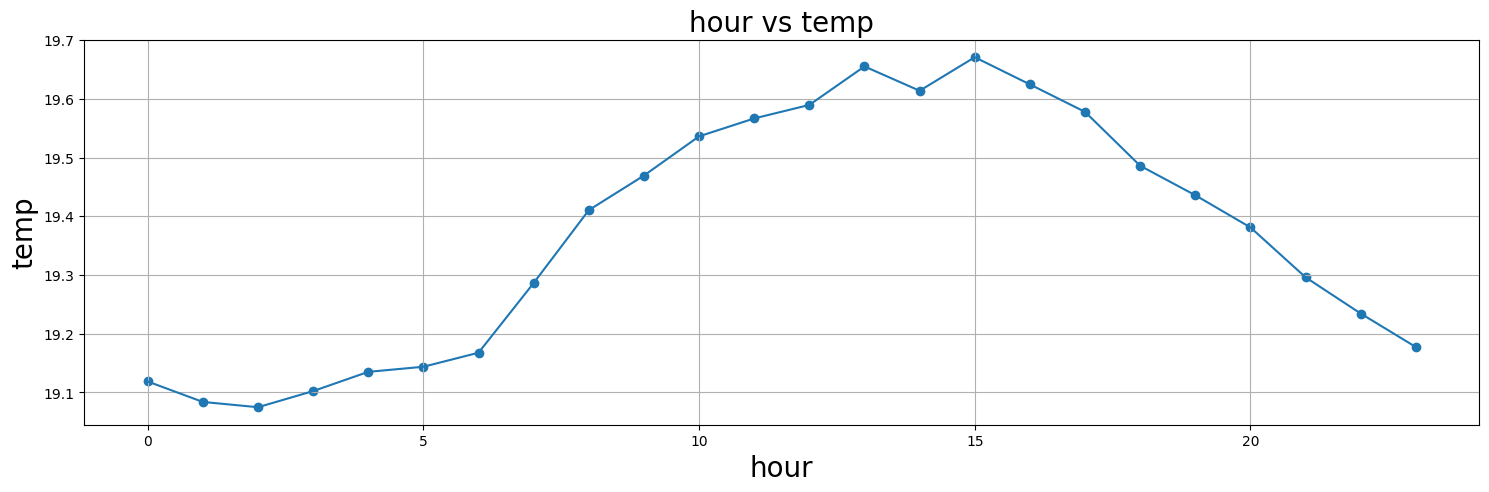

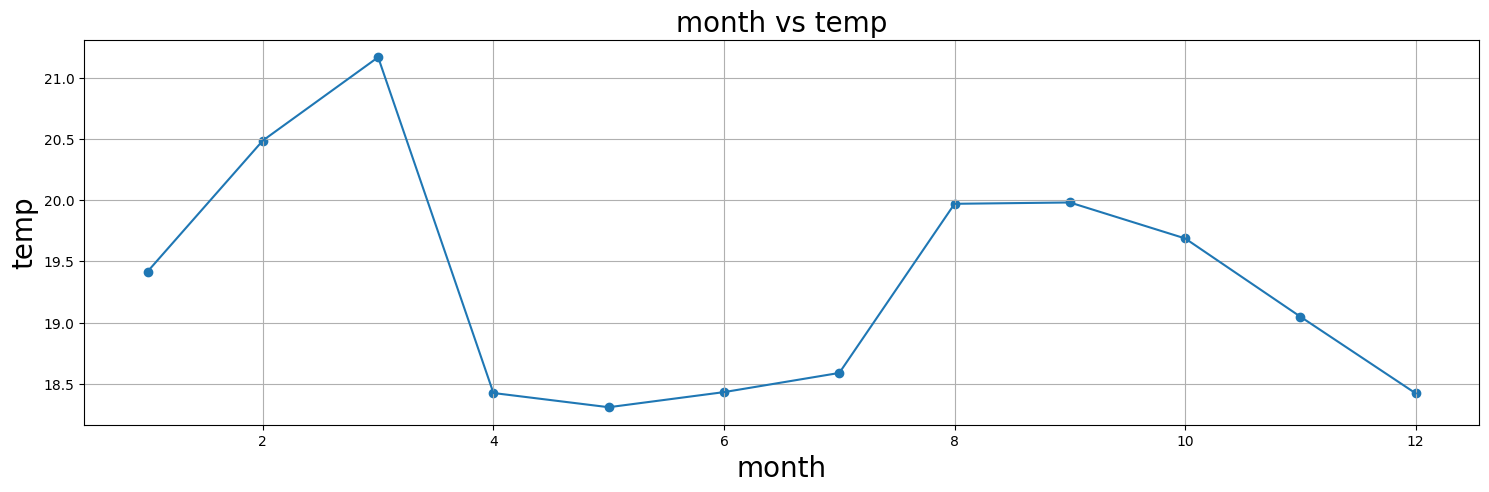

In [ ]:
feature_Y = 'temp'

feature_X = 'minute'
data_group = data[[feature_X, feature_Y]].groupby(feature_X, as_index=False).mean()
# groupby(feature muốn group, ko quan tâm index)
SensorVisualize(df = data_group, feature_X=feature_X, feature_Y=feature_Y)

feature_X = 'hour'
data_group = data[[feature_X, feature_Y]].groupby(feature_X, as_index=False).mean()
SensorVisualize(df = data_group, feature_X=feature_X, feature_Y=feature_Y)

feature_X = 'month'
data_group = data[[feature_X, feature_Y]].groupby(feature_X, as_index=False).mean()
SensorVisualize(df = data_group, feature_X=feature_X, feature_Y=feature_Y)


### **5. Built Model**

> Trong bài này ta chỉ quan tâm đánh giá sự biến động của temp theo từng phút trong ngày, quan sát đồ thị 'minute vs temp'.
* Đồ thị này có dạng phi tuyến.
* Có thể xấp xỉ được đồ thị này bằng hàm bậc 3 trở lên (>=3).
* Ta chọn hàm bậc 4.
* Sử dụng Polynomial Linear Regression: Hồi quy đa thức để giải quyết bài toán.

##### **Step 1: Tách feature minute, kết quả cần phải là 2D array (để tạo X_poly)**

In [ ]:
feature_X = 'minute'
feature_Y = 'temp'
data_group = data[[feature_X, feature_Y]].groupby(feature_X, as_index = False).mean()
# Ta cần X là 2D array để có thể fit với model
X = data_group[[feature_X]].values
y = data_group[feature_Y].values

print(X)
print(X.shape)
print(y)
print(y.shape)

[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
(1440, 1)
[19.16173121 19.15331808 19.16968326 ... 19.15789474 19.13211845
 19.15068493]
(1440,)


##### **Step 2: X ==> X_poly(1, x, x^2, x^3, x^4)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree=4)
X_poly = poly_regression.fit_transform(X)
print(X_poly[:10])

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]]


##### **Step 3: X_poly ==> temp: Polynomal Linear Regression y=(a0,a1,a2,a3,a4,a5)*X_poly+b**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_poly, y)

print(linear_regression.coef_) # (a0,a1,a2,a3,a4,a5)
print(linear_regression.intercept_) # (b)

[ 0.00000000e+00 -1.95037319e-03  8.06635273e-06 -8.03972140e-09
  2.33433628e-12]
19.191231749209738


>##### **Step 4**
* Predict output y_pred với input là X_poly.
* Tính Residual = [abs(y_true0-y_pred0), abs(y_true1-y_pred1)...,abs(y_true1439-y_pred1439]
* Residual = Error Distribution = (mean, std) ==> Confident Range (mean +/- 3*std)
* Cảnh báo nếu gặp các giá trị nằm ngoài confident range.

In [ ]:
y_pred = linear_regression.predict(poly_regression.fit_transform(X))
y_true = y
print(y_true)
print(y_pred)
residual = abs(y_true-y_pred)
print(residual)

[19.16173121 19.15331808 19.16968326 ... 19.15789474 19.13211845
 19.15068493]
[19.19123175 19.18928943 19.1873632  ... 19.14239875 19.14153535
 19.14067664]
[0.02950054 0.03597136 0.01767995 ... 0.01549599 0.0094169  0.01000829]


In [ ]:
std = np.std(residual)
y_predict_upBound = y_pred+3*std
y_predict_lowBound = y_pred-3*std

print('Up Bound:\n ',y_predict_upBound)
print('Low Bound:\n ',y_predict_lowBound)

Up Bound:
  [19.25124519 19.24930288 19.24737665 ... 19.20241219 19.20154879
 19.20069009]
Low Bound:
  [19.13121831 19.12927599 19.12734976 ... 19.08238531 19.08152191
 19.0806632 ]


In [ ]:
def SensorVisualize_withprediction(df, feature_X, feature_Y, mode='Inference', savefig=False):
  plt.figure(figsize=(18, 5))
  plt.scatter(df[feature_X], df[feature_Y])
  plt.plot(df[feature_X], df[feature_Y])

  if mode:
    plt.plot(df[feature_X], y_pred, color='red', linewidth=5)
  if not mode:
    print('Not inference mode')

  plt.title(f'{feature_X} Vs {feature_Y}', size = 20)
  plt.xlabel(feature_X, size = 20)
  plt.ylabel(feature_Y, size = 20)
  plt.grid()
  if(savefig): # <==> if (savefig=False)
      plt.savefig(f'{feature_X} Vs {feature_Y} Analysis.jpg')

In [ ]:
feature_X, feature_Y, y_pred

('minute',
 'temp',
 array([19.19123175, 19.18928943, 19.1873632 , ..., 19.14239875,
        19.14153535, 19.14067664]))

Not inference mode


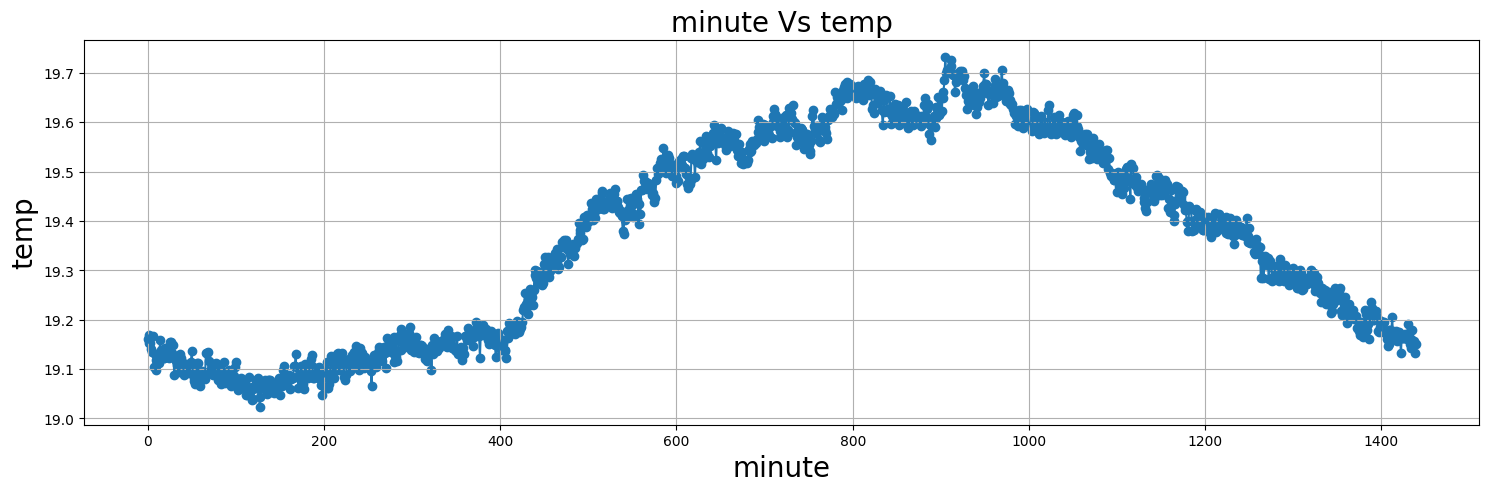

In [ ]:
SensorVisualize_withprediction(data_group, feature_X=feature_X, feature_Y=feature_Y, mode=False, savefig=False)

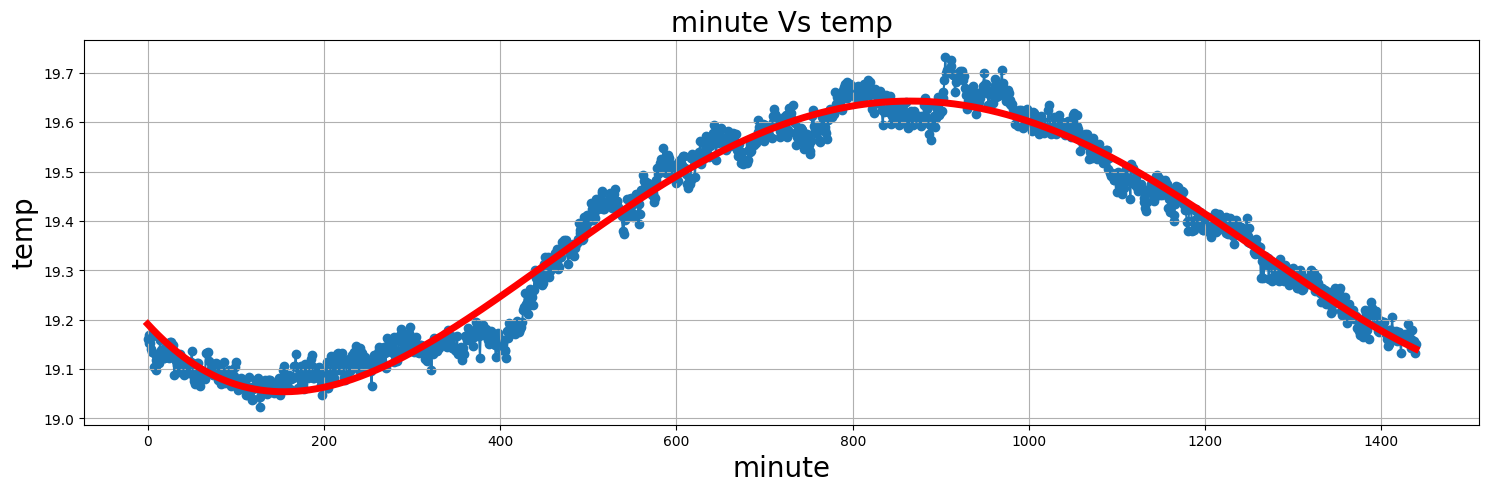

In [ ]:
SensorVisualize_withprediction(data_group, feature_X=feature_X, feature_Y=feature_Y, mode=True, savefig=False)

In [ ]:
np.sqrt(4)

2.0

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Rsquare2 = round(r2_score(y_true, y_pred), 5)
MSE = round(mean_squared_error(y_true, y_pred), 5)
RMSE = round(mean_squared_error(y_true, y_pred, squared=False), 5) # RMSE=sqrt(MSE)
MAE = round(mean_absolute_error(y_true, y_pred), 5)

print(f"Rsquare2 : {Rsquare2}")
print(f"Mean Square Error : {MSE}")
print(f"Root Mean Square Error : {RMSE}")
print(f"Mean Absolute Error : {MAE}")

Rsquare2 : 0.97572
Mean Square Error : 0.00103
Root Mean Square Error : 0.03213
Mean Absolute Error : 0.02515


In [ ]:
residuals = y_true-y_pred
residuals

array([-0.02950054, -0.03597136, -0.01767995, ...,  0.01549599,
       -0.0094169 ,  0.01000829])

In [ ]:
residual

array([0.02950054, 0.03597136, 0.01767995, ..., 0.01549599, 0.0094169 ,
       0.01000829])

<Figure size 2000x500 with 0 Axes>

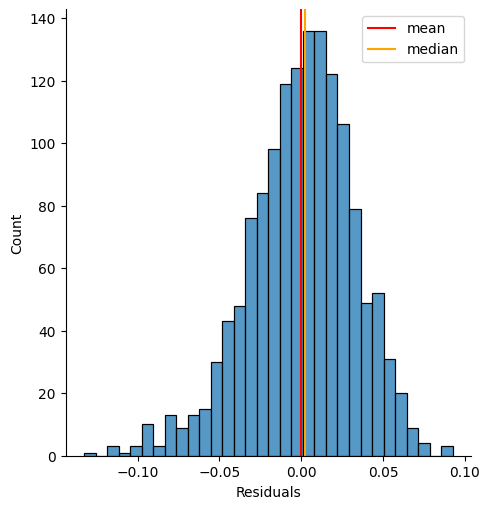

In [ ]:
# Vẽ phân phối (Distribution) của dữ resiaduals
residuals = y_true - y_pred
plt.figure(figsize=(20,5))
sns.displot(residuals)
plt.axvline(x = np.mean(residuals), color = 'red', label = 'mean')
plt.axvline(x = np.median(residuals), color = 'orange', label = 'median')
plt.xlabel("Residuals")
plt.legend(loc = "upper right")
plt.show()

> **Nhận xét**:
* Residuals thể hiện sự chênh lệch giữa y_true và y_pred.
* Quan sát biểu đồ ta thấy y_true và y_pred có sự chênh lệch trên tổng thể data là nhỏ, vì số lượng giá trị chênh lệch tập trung chủ yếu xung quanh mean và median (2 giá trị này xấp xỉ với 0).
* Vẫn còn 1 lượng nhỏ các chênh lệch nằm xa mean và median.

In [ ]:
print('std: ',std)
print('Up Bound:\n ',y_predict_upBound)
print('Low Bound:\n ',y_predict_lowBound)

std:  0.02000448111798664
Up Bound:
  [19.25124519 19.24930288 19.24737665 ... 19.20241219 19.20154879
 19.20069009]
Low Bound:
  [19.13121831 19.12927599 19.12734976 ... 19.08238531 19.08152191
 19.0806632 ]


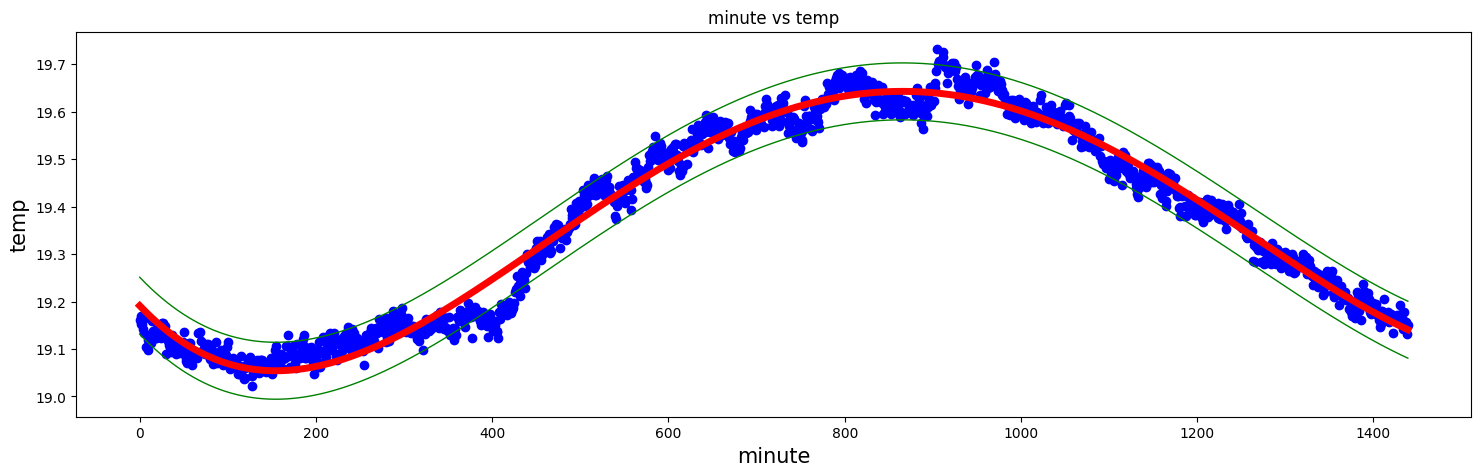

In [ ]:
# Visualize up bound, low bound và hàm y tìm được.
# Những vùng có điểm nằm ngoài up bound và low bound là những điểm cần cảnh báo
plt.figure(figsize=(18, 5))
plt.scatter(X,y, color = "blue")
plt.plot(X, y_pred, color = "red", linewidth = 5)
plt.plot(X, y_predict_upBound, color = "green", linewidth = 1)
plt.plot(X, y_predict_lowBound, color = "green", linewidth = 1)
plt.title(f"{feature_X} vs {feature_Y}")
plt.xlabel(feature_X, size = 15)
plt.ylabel(feature_Y, size = 15)
plt.show()

In [ ]:
print(X), print(X.shape), print(X.shape[0]), print(X.shape[1]), print(X.shape[-1])
print(X.reshape(-1)), print(X.reshape(-1).shape)

[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
(1440, 1)
1440
1
1
[   0    1    2 ... 1437 1438 1439]
(1440,)


(None, None)

In [ ]:
# Xuất các Alarm time
LogDF = pd.DataFrame(columns=["minute", "true_temp", "predicted_temp", "conf_lower", "conf_upper"])
LogDF['minute'] = X.reshape(-1) # Reshape 2D array into 1D array
LogDF['true_temp'] = y
LogDF['predicted_temp'] = y_pred
LogDF['conf_lower'] = y_predict_lowBound
LogDF['conf_upper'] = y_predict_upBound
LogDF['Alarm'] = (LogDF['true_temp'] > LogDF['conf_upper']) | (LogDF['true_temp'] < LogDF['conf_lower'])
display(LogDF.head())

print('Alarm Time')
print(LogDF[LogDF['Alarm'] == True])

,minute,true_temp,predicted_temp,conf_lower,conf_upper,Alarm
0,0,19.161731,19.191232,19.131218,19.251245,False
1,1,19.153318,19.189289,19.129276,19.249303,False
2,2,19.169683,19.187363,19.127350,19.247377,False
3,3,19.152273,19.185453,19.125440,19.245466,False
4,4,19.141230,19.183559,19.123545,19.243572,False


Alarm Time
      minute  true_temp  predicted_temp  conf_lower  conf_upper  Alarm
7          7  19.104784       19.177972   19.117958   19.237985   True
9          9  19.098174       19.174326   19.114312   19.234339   True
168      168  19.129841       19.054972   18.994958   19.114985   True
185      185  19.120729       19.058313   18.998300   19.118327   True
186      186  19.129545       19.058585   18.998572   19.118599   True
...      ...        ...             ...         ...         ...    ...
1100    1100  19.459016       19.522941   19.462927   19.582954   True
1106    1106  19.454333       19.517123   19.457110   19.577136   True
1115    1115  19.445221       19.508198   19.448185   19.568212   True
1132    1132  19.426914       19.490724   19.430710   19.550737   True
1133    1133  19.420930       19.489672   19.429659   19.549685   True

[88 rows x 6 columns]


### **6. Conclusion**
* Từ data thu thập được, ta xây dựng 1 model Linear Regression để mô hình hóa được các giá trị của temp trong ngày.
* Đường màu đỏ trong biểu đồ là model ta dự đoán được, từ đây ta tính ra các upbound và lowbound.
* So sánh y_true với upbound và lowbound để tìm ra được các điểm bất thường về nhiệt độ trong thực tế. (Các điểm mà đáng lẽ ra phải bằng với y_pred, thì mới là không bất thường, cần chú ý vì đây là 1 điểm hơi ngược ngược so với các bài toán khác)
* Tuy là bài về Linear Regressin nhưng có thể thấy mục tiêu chính của bài này lại là tìm ra các điểm có nhiệt độ bất thường trong ngày.
